# **ACT.4 Extracción de características**
## María Fernanda Martínez Ríos
A01067198

In [ ]:
#Instalamos librería para análisis de variables categóricas
!pip install funpymodeling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.5/215.5 kB 5.7 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=1fc14c6465301460a445b4021d2198150a03eadc3d58306f63e519340b47cb51
  Stored in directory: /root/.cache/pip/wheels/46/b8/69/4f7789b7d2fc0718a44cbc4ae5d40970a40c22c472ae50f0a1
Successfully built sklearn
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

In [ ]:
Micro_Retailer= pd.read_excel('microretailer_mit_lift_lab.xlsx') 

In [ ]:
Micro_Retailer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [ ]:
Micro_Retailer.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN


### Eliminar nulos del dataframe

In [ ]:
Micro_Retailer.isnull().sum()

_record_id                                0
_title                                    0
_server_updated_at                        0
_updated_by                               0
_geometry                                 0
                                       ... 
234_willingness_participate_workshop     73
318_shopkeeper_name                     123
319_shopkeepers_last_name               125
236_whatsapp                            129
235_email                               142
Length: 106, dtype: int64

In [ ]:
numericas=Micro_Retailer.select_dtypes(include=['float']).columns
Micro_Retailer[numericas] = Micro_Retailer[numericas].fillna(0)
categoricas=Micro_Retailer.select_dtypes(include=['object']).columns
Micro_Retailer[categoricas] = Micro_Retailer[categoricas].replace(np.nan, 'Sin registro', regex=True)

In [ ]:
Micro_Retailer.isnull().sum()

_record_id                              0
_title                                  0
_server_updated_at                      0
_updated_by                             0
_geometry                               0
                                       ..
234_willingness_participate_workshop    0
318_shopkeeper_name                     0
319_shopkeepers_last_name               0
236_whatsapp                            0
235_email                               0
Length: 106, dtype: int64

### Eliminar outliers del dataframe

<Figure size 1500x800 with 0 Axes>

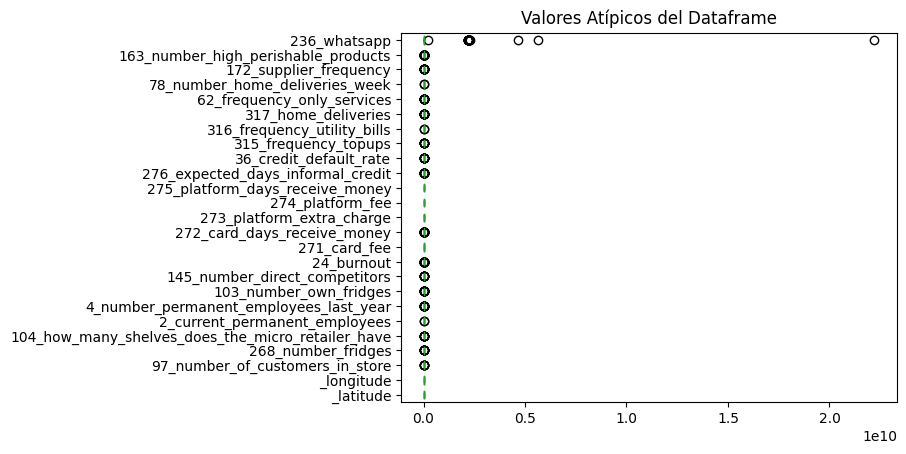

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
Micro_Retailer.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=Micro_Retailer
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido _latitude                                            1.911117e+01
_longitude                                          -9.809030e+01
97_number_of_customers_in_store                      6.591777e+00
268_number_fridges                                   1.015176e+01
104_how_many_shelves_does_the_micro_retailer_have    5.581292e+01
2_current_permanent_employees                        1.329571e+01
4_number_permanent_employees_last_year               1.192254e+01
103_number_own_fridges                               5.885954e+00
145_number_direct_competitors                        1.248897e+01
24_burnout                                           6.996329e+00
271_card_fee                                         0.000000e+00
272_card_days_receive_money                          2.123366e+00
273_platform_extra_charge                            0.000000e+00
274_platform_fee                                     0.000000e+00
275_platform_days_receive_money                   

<ipython-input-12-7ea168a15e40>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-12-7ea168a15e40>:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-12-7ea168a15e40>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence th

In [ ]:
#Encontramos Ouliers del Dataframe
outliers= Micro_Retailer[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

<ipython-input-13-aae5aa532ffe>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers= Micro_Retailer[(y>Limite_Superior)|(y<Limite_Inferior)]


,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
Micro_Retailer_iqr= Micro_Retailer[(y<=Limite_Superior)&(y>=Limite_Inferior)]
Micro_Retailer_iqr

<ipython-input-14-cb6a431093e2>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  Micro_Retailer_iqr= Micro_Retailer[(y<=Limite_Superior)&(y>=Limite_Inferior)]


,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,NaN,NaN,NaN,NaN,NaN,19.053536,-98.233822,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,NaN,NaN,NaN,NaN,NaN,19.053561,-98.234142,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,NaN,NaN,NaN,NaN,NaN,19.058655,-98.232300,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,NaN,NaN,NaN,NaN,NaN,19.059293,-98.233158,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,NaN,NaN,NaN,NaN,NaN,19.059585,-98.233864,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,NaN,NaN,NaN,NaN,NaN,19.043115,-98.194066,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
167,NaN,NaN,NaN,NaN,NaN,19.042794,-98.193802,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
168,NaN,NaN,NaN,NaN,NaN,19.042809,-98.193439,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
169,NaN,NaN,NaN,NaN,NaN,19.042558,-98.193818,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=Micro_Retailer_iqr.isnull().sum()
valores_nulos

_record_id                              171
_title                                  171
_server_updated_at                      171
_updated_by                             171
_geometry                               171
                                       ... 
234_willingness_participate_workshop    171
318_shopkeeper_name                     171
319_shopkeepers_last_name               171
236_whatsapp                              1
235_email                               171
Length: 106, dtype: int64

In [ ]:
MR_clean=Micro_Retailer_iqr.copy()

numericas=MR_clean.select_dtypes(include=['float']).columns
MR_clean[numericas] = MR_clean[numericas].fillna(0)
categoricas=MR_clean.select_dtypes(include=['object']).columns
MR_clean[categoricas] = MR_clean[categoricas].replace(np.nan, 'Sin registro', regex=True)

In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=MR_clean.isnull().sum()
valores_nulos

_record_id                              0
_title                                  0
_server_updated_at                      0
_updated_by                             0
_geometry                               0
                                       ..
234_willingness_participate_workshop    0
318_shopkeeper_name                     0
319_shopkeepers_last_name               0
236_whatsapp                            0
235_email                               0
Length: 106, dtype: int64

In [ ]:
columns_to_drop = []

for column in MR_clean.columns:
    if MR_clean[column].nunique() == 1:
        columns_to_drop.append(column)

print(columns_to_drop)

['_record_id', '_title', '_server_updated_at', '_updated_by', '_geometry', '228_store_name', '229_store_picture', '232_type_of_store', '108_does_the_micro_retailer_has_a_barred_window_', '99_does_the_micro_retailer_exhibits_products_outside_', '102_does_the_micro_retailer_sells_fresh_products_', '184_store_devices', 'pictures_of_shelves_if_possible', 'hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz', 'le_comento_que_toda_esta_informacin_es_confidencial', '233_date_establishment', '5_change_store_space_last_year', '6_change_employees_average_salary_last_year', '20_reviews_finances_monthly', '49_inventory_records', '18_sales_records', '155_sales_registers_used_for', '19_tax_id', '310_burnout', '186_internet_connection', '210_sales_channels', '189_payment_methods', '28_prefered_payment_method', '31_different_prices_payment_method', '269_cash_discount', '270_card_extra_charge', '271_card_fee', '273_platform_extra_charge', '274_platform_fee', '275_platform_days_receive_money', '3

In [ ]:
MR_clean

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,19.053536,-98.233822,Sin registro,Sin registro,Sin registro,...,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,0.0,Sin registro
1,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,19.053561,-98.234142,Sin registro,Sin registro,Sin registro,...,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,0.0,Sin registro
2,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,19.058655,-98.232300,Sin registro,Sin registro,Sin registro,...,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,0.0,Sin registro
3,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,19.059293,-98.233158,Sin registro,Sin registro,Sin registro,...,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,0.0,Sin registro
4,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,19.059585,-98.233864,Sin registro,Sin registro,Sin registro,...,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,0.0,Sin registro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,19.043115,-98.194066,Sin registro,Sin registro,Sin registro,...,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,0.0,Sin registro
167,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,19.042794,-98.193802,Sin registro,Sin registro,Sin registro,...,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,0.0,Sin registro
168,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,19.042809,-98.193439,Sin registro,Sin registro,Sin registro,...,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,0.0,Sin registro
169,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,19.042558,-98.193818,Sin registro,Sin registro,Sin registro,...,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,0.0,Sin registro


### Análisis univariado

In [ ]:
#Extraer características a partir de aplicar un análisis univariado, a diferentes variables categóricas (20). 
#Mostrar los resultados obtenidos ,mediante gráficas y tablas

a_univariado = Micro_Retailer.select_dtypes(include=['object'])
a_univariado.head(20)

,_record_id,_title,_server_updated_at,_updated_by,_geometry,228_store_name,229_store_picture,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,...,260_technology_scalable,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),Eugene’s Compostura,1 Photo,Tailor,yes,no,...,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,no,Sin registro,Sin registro,Sin registro
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),no,yes,...,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,no,Sin registro,Sin registro,Sin registro
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),Libélula,1 Photo,Grocery store (aka. nanostore),yes,no,...,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,no,Sin registro,Sin registro,Sin registro
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),Quality fix,1 Photo,Grocery store (aka. nanostore),no,no,...,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,no,Sin registro,Sin registro,Sin registro
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),yes,no,...,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,no,Sin registro,Sin registro,Sin registro
5,2ab862d8-1449-42fe-9de0-63f0fa86e41c,"November 12, 2022",2022-11-12 22:15:07 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2340100497 19.0595598862),La fête,1 Photo,Cafeteria,no,no,...,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,no,Sin registro,Sin registro,Sin registro
6,eac16b89-1988-491f-a827-60481298aa35,"November 12, 2022",2022-11-12 22:15:06 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233027074 19.0590374022),Yo reparo,1 Photo,Technology Store,yes,yes,...,Sin registro,Sin registro,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Sin registro,Sin registro,Sin registro
7,719cdad7-cf49-4c64-9f1d-004279b71da0,"November 12, 2022",2022-11-12 22:15:06 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2298178552 19.0607069876),Miscenlánea Manolos,1 Photo,Grocery store (aka. nanostore),yes,no,...,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,yes,Fernanda,Escobedo,fer.escobedo.meneses@gmail.com
8,b7494ae1-8154-4538-afd2-f9362d561ed1,"November 12, 2022",2022-11-12 22:15:05 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2252770749 19.0594737148),Mundo Ciclista,1 Photo,Retailer store,yes,no,...,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,yes,Jesús,Lares,mundociclistapuebla@gmail.com
9,684fc35a-25b7-47b4-be58-bbc8c5bab3fb,"November 12, 2022",2022-11-12 22:15:05 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2242125705 19.0588832074),Copias & Max,1 Photo,Grocery store (aka. nanostore),yes,no,...,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,yes,Rocio,Salazar,Sin registro


In [ ]:
a_univariado.isnull().sum()

_record_id                                        0
_title                                            0
_server_updated_at                                0
_updated_by                                       0
_geometry                                         0
                                                 ..
267_technology_investment_customer_preferences    0
234_willingness_participate_workshop              0
318_shopkeeper_name                               0
319_shopkeepers_last_name                         0
235_email                                         0
Length: 81, dtype: int64

In [ ]:
freq_tbl(a_univariado)

                               _record_id  frequency  percentage  \
0    dff2998e-af74-4de6-8efd-488aca24e67b          1    0.005848   
1    53c25f08-1c1b-4c1c-97d5-b45c940735cc          1    0.005848   
2    af5c48b5-a916-47a6-aacc-1128ea1e728e          1    0.005848   
3    4790411b-df1d-44f0-a659-6d99e26ae765          1    0.005848   
4    e70db20a-25db-412b-9a71-7df285c92a3d          1    0.005848   
..                                    ...        ...         ...   
166  75bcc709-90ff-4db7-bb82-293f2f72f3ae          1    0.005848   
167  bd59c8b6-81cb-4698-8cfd-dbab7f01ef21          1    0.005848   
168  94b1c6bc-1fb8-4895-aacc-c2604dc12b93          1    0.005848   
169  d9ff4194-657e-4fb4-b5f4-b7e8b350a646          1    0.005848   
170  bf720ff0-3b7d-47ed-ba49-f5d4bfb7293c          1    0.005848   

     cumulative_perc  
0           0.005848  
1           0.011696  
2           0.017544  
3           0.023392  
4           0.029240  
..               ...  
166         0.976608  

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(a_univariado['214_customer_relationship_tools'])
table1



,214_customer_relationship_tools,frequency,percentage,cumulative_perc
0,Sin registro,76,0.444444,0.444444
1,Redes sociales,27,0.157895,0.602339
2,Aplicación móvil,21,0.122807,0.725146
3,Ninguna,20,0.116959,0.842105
4,"Aplicación móvil,Redes sociales",13,0.076023,0.918129
5,Cuaderno,6,0.035088,0.953216
6,Teléfono,1,0.005848,0.959064
7,"Cuaderno,Redes sociales",1,0.005848,0.964912
8,"Aplicación móvil,De frente",1,0.005848,0.970760
9,Físico,1,0.005848,0.976608


In [ ]:
numericas=Micro_Retailer.select_dtypes(include=['float']).columns
Micro_Retailer[numericas]=Micro_Retailer[numericas].fillna(value=0)
categoricas=Micro_Retailer.select_dtypes(include=['object']).columns
Micro_Retailer[categoricas]=Micro_Retailer[categoricas].fillna(value='Sin registro')